In [1]:
# env - pip install pyspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('xji387_infosys722-4').getOrCreate()

In [2]:
train = spark.read.csv('Datasets/train_data.csv', header=True, inferSchema=True)
test = spark.read.csv('Datasets/test_data.csv', header=True, inferSchema=True)
dictionary = spark.read.csv('Datasets/train_data_dictionary.csv', header=True, inferSchema=True)
sample = spark.read.csv('Datasets/sample_sub.csv', header=True, inferSchema=True)

In [3]:
train.show(5, False)

+-------+-------------+------------------+------------------+--------------------+---------------------------------+------------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+-----+
|case_id|Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|Available Extra Rooms in Hospital|Department  |Ward_Type|Ward_Facility_Code|Bed Grade|patientid|City_Code_Patient|Type of Admission|Severity of Illness|Visitors with Patient|Age  |Admission_Deposit|Stay |
+-------+-------------+------------------+------------------+--------------------+---------------------------------+------------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+-----+
|1      |8            |c                 |3                 |Z                   |3                                |radiotherapy|R        |

In [4]:
test.show(5, False)

+-------+-------------+------------------+------------------+--------------------+---------------------------------+----------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+
|case_id|Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|Available Extra Rooms in Hospital|Department|Ward_Type|Ward_Facility_Code|Bed Grade|patientid|City_Code_Patient|Type of Admission|Severity of Illness|Visitors with Patient|Age  |Admission_Deposit|
+-------+-------------+------------------+------------------+--------------------+---------------------------------+----------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+
|318439 |21           |c                 |3                 |Z                   |3                                |gynecology|S        |A                 |2.0    

In [5]:
print((train.count(), len(train.columns)))

(318438, 18)


In [6]:
print((test.count(), len(test.columns)))

(137057, 17)


In [7]:
dictionary.show(dictionary.count(), False)

+---------------------------------+---------------------------------------------------------+
|Column                           |Description                                              |
+---------------------------------+---------------------------------------------------------+
|case_id                          |Case_ID registered in Hospital                           |
|Hospital_code                    |Unique code for the Hospital                             |
|Hospital_type_code               |Unique code for the type of Hospital                     |
|City_Code_Hospital               |City Code of the Hospital                                |
|Hospital_region_code             |Region Code of the Hospital                              |
|Available Extra Rooms in Hospital|Number of Extra rooms available in the Hospital          |
|Department                       |Department overlooking the case                          |
|Ward_Type                        |Code for the Ward type   

In [8]:
train.select(train.columns[:5]).describe().show()
train.select(train.columns[5:10]).describe().show()
train.select(train.columns[10:15]).describe().show()
train.select(train.columns[15:len(train.columns)]).describe().show()

+-------+---------------+------------------+------------------+------------------+--------------------+
|summary|        case_id|     Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|
+-------+---------------+------------------+------------------+------------------+--------------------+
|  count|         318438|            318438|            318438|            318438|              318438|
|   mean|       159219.5|18.318840716246175|              null| 4.771716943329627|                null|
| stddev|91925.276847557| 8.633754885795042|              null|3.1025353546703163|                null|
|    min|              1|                 1|                 a|                 1|                   X|
|    max|         318438|                32|                 g|                13|                   Z|
+-------+---------------+------------------+------------------+------------------+--------------------+

+-------+---------------------------------+------------------+-

In [9]:
test.select(test.columns[:5]).describe().show()
test.select(test.columns[5:10]).describe().show()
test.select(test.columns[10:15]).describe().show()
test.select(test.columns[15:len(test.columns)]).describe().show()

+-------+-----------------+-----------------+------------------+------------------+--------------------+
|summary|          case_id|    Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|
+-------+-----------------+-----------------+------------------+------------------+--------------------+
|  count|           137057|           137057|            137057|            137057|              137057|
|   mean|         386967.0|18.34374749191942|              null| 4.758691639244986|                null|
| stddev|39565.09225946529|8.634694394976176|              null| 3.102244618227632|                null|
|    min|           318439|                1|                 a|                 1|                   X|
|    max|           455495|               32|                 g|                13|                   Z|
+-------+-----------------+-----------------+------------------+------------------+--------------------+

+-------+---------------------------------+-----------

In [10]:
print('Train data set schema: \n')
train.printSchema()

Train data set schema: 

root
 |-- case_id: integer (nullable = true)
 |-- Hospital_code: integer (nullable = true)
 |-- Hospital_type_code: string (nullable = true)
 |-- City_Code_Hospital: integer (nullable = true)
 |-- Hospital_region_code: string (nullable = true)
 |-- Available Extra Rooms in Hospital: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- Ward_Type: string (nullable = true)
 |-- Ward_Facility_Code: string (nullable = true)
 |-- Bed Grade: double (nullable = true)
 |-- patientid: integer (nullable = true)
 |-- City_Code_Patient: double (nullable = true)
 |-- Type of Admission: string (nullable = true)
 |-- Severity of Illness: string (nullable = true)
 |-- Visitors with Patient: integer (nullable = true)
 |-- Age: string (nullable = true)
 |-- Admission_Deposit: double (nullable = true)
 |-- Stay: string (nullable = true)



In [11]:
print('Test data set schema: \n')
test.printSchema()

Test data set schema: 

root
 |-- case_id: integer (nullable = true)
 |-- Hospital_code: integer (nullable = true)
 |-- Hospital_type_code: string (nullable = true)
 |-- City_Code_Hospital: integer (nullable = true)
 |-- Hospital_region_code: string (nullable = true)
 |-- Available Extra Rooms in Hospital: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- Ward_Type: string (nullable = true)
 |-- Ward_Facility_Code: string (nullable = true)
 |-- Bed Grade: double (nullable = true)
 |-- patientid: integer (nullable = true)
 |-- City_Code_Patient: double (nullable = true)
 |-- Type of Admission: string (nullable = true)
 |-- Severity of Illness: string (nullable = true)
 |-- Visitors with Patient: integer (nullable = true)
 |-- Age: string (nullable = true)
 |-- Admission_Deposit: double (nullable = true)



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import numpy as np

In [13]:
import pyspark.sql.functions as F
from pyspark.sql.functions import avg, round
row_count=train.select().count()
per=round((F.col('count')/row_count)*100,2)
train.groupBy('Stay').count().sort('count', ascending=False).withColumn('%',per).show()

+------------------+-----+-----+
|              Stay|count|    %|
+------------------+-----+-----+
|             21-30|87491|27.48|
|             11-20|78139|24.54|
|             31-40|55159|17.32|
|             51-60|35018| 11.0|
|              0-10|23604| 7.41|
|             41-50|11743| 3.69|
|             71-80|10254| 3.22|
|More than 100 Days| 6683|  2.1|
|             81-90| 4838| 1.52|
|            91-100| 2765| 0.87|
|             61-70| 2744| 0.86|
+------------------+-----+-----+



In [14]:
train.groupBy('Severity of Illness').count().sort('count', ascending=False).withColumn('%',per).show()

+-------------------+------+-----+
|Severity of Illness| count|    %|
+-------------------+------+-----+
|           Moderate|175843|55.22|
|              Minor| 85872|26.97|
|            Extreme| 56723|17.81|
+-------------------+------+-----+



In [15]:
train.groupBy('Type of Admission').count().sort('count', ascending=False).withColumn('%',per).show()

+-----------------+------+-----+
|Type of Admission| count|    %|
+-----------------+------+-----+
|           Trauma|152261|47.81|
|        Emergency|117676|36.95|
|           Urgent| 48501|15.23|
+-----------------+------+-----+



In [16]:
train.groupBy('Age').count().sort('count', ascending=False).withColumn('%',per).show()

+------+-----+-----+
|   Age|count|    %|
+------+-----+-----+
| 41-50|63749|20.02|
| 31-40|63639|19.98|
| 51-60|48514|15.23|
| 21-30|40843|12.83|
| 71-80|35792|11.24|
| 61-70|33687|10.58|
| 11-20|16768| 5.27|
| 81-90| 7890| 2.48|
|  0-10| 6254| 1.96|
|91-100| 1302| 0.41|
+------+-----+-----+



In [17]:
train.groupBy('Visitors with Patient').count().sort('count', ascending=False).withColumn('%',per).show()

+---------------------+------+-----+
|Visitors with Patient| count|    %|
+---------------------+------+-----+
|                    2|138417|43.47|
|                    4| 79225|24.88|
|                    3| 59180|18.58|
|                    6| 18860| 5.92|
|                    5|  9219|  2.9|
|                    8|  4872| 1.53|
|                    7|  2504| 0.79|
|                    9|  1358| 0.43|
|                    1|  1207| 0.38|
|                   10|  1183| 0.37|
|                   12|   968|  0.3|
|                   11|   327|  0.1|
|                   16|   286| 0.09|
|                   14|   207| 0.07|
|                   15|   194| 0.06|
|                   13|   106| 0.03|
|                   24|    78| 0.02|
|                   20|    62| 0.02|
|                   18|    61| 0.02|
|                    0|    22| 0.01|
+---------------------+------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='Visitors with Patient', ylabel='Stay'>

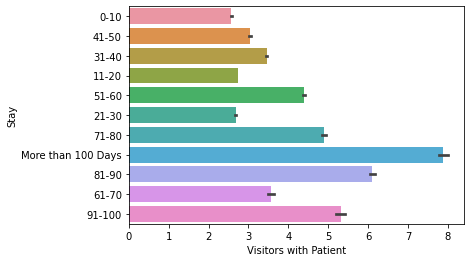

In [18]:
train_pd = train.toPandas()
sns.barplot(x= "Visitors with Patient",y= "Stay", data = train_pd)

<AxesSubplot:xlabel='Hospital_type_code', ylabel='count'>

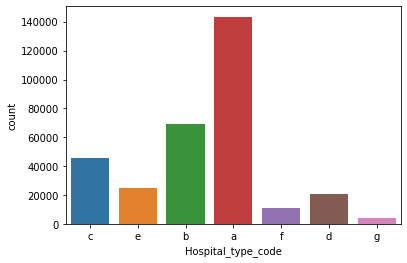

In [19]:
sns.countplot(x = 'Hospital_type_code', data = train_pd)

In [20]:
train.groupBy('Ward_Type').count().sort('count', ascending=False).withColumn('%',per).show()

+---------+------+-----+
|Ward_Type| count|    %|
+---------+------+-----+
|        R|127947|40.18|
|        Q|106165|33.34|
|        S| 77794|24.43|
|        P|  5046| 1.58|
|        T|  1477| 0.46|
|        U|     9|  0.0|
+---------+------+-----+



In [21]:
train.groupBy('Ward_Facility_Code').count().sort('count', ascending=False).withColumn('%',per).show()

+------------------+------+-----+
|Ward_Facility_Code| count|    %|
+------------------+------+-----+
|                 F|112753|35.41|
|                 E| 55351|17.38|
|                 D| 51809|16.27|
|                 C| 35463|11.14|
|                 B| 35156|11.04|
|                 A| 27906| 8.76|
+------------------+------+-----+



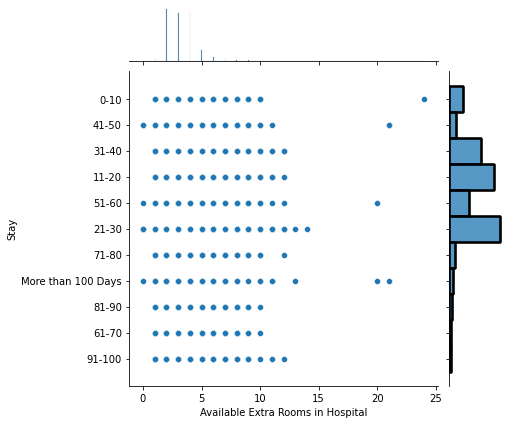

In [22]:
sns.jointplot(x= "Available Extra Rooms in Hospital", y= "Stay", data = train_pd)

In [23]:
train.groupBy('Department').count().sort('count', ascending=False).withColumn('%',per).show()

+------------------+------+-----+
|        Department| count|    %|
+------------------+------+-----+
|        gynecology|249486|78.35|
|        anesthesia| 29649| 9.31|
|      radiotherapy| 28516| 8.95|
|TB & Chest disease|  9586| 3.01|
|           surgery|  1201| 0.38|
+------------------+------+-----+



<AxesSubplot:xlabel='Hospital_code', ylabel='count'>

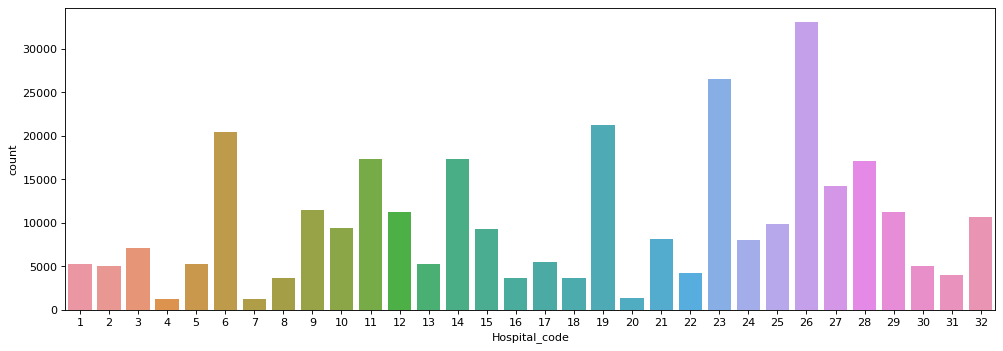

In [24]:
plt.figure(figsize=(15, 5), dpi=80)
sns.countplot(data = train_pd, x = 'Hospital_code')

In [25]:
train.groupBy('Hospital_code').count().sort('count', ascending=False).withColumn('%',per).show()

+-------------+-----+-----+
|Hospital_code|count|    %|
+-------------+-----+-----+
|           26|33076|10.39|
|           23|26566| 8.34|
|           19|21219| 6.66|
|            6|20425| 6.41|
|           11|17328| 5.44|
|           14|17328| 5.44|
|           28|17137| 5.38|
|           27|14244| 4.47|
|            9|11510| 3.61|
|           29|11311| 3.55|
|           12|11297| 3.55|
|           32|10703| 3.36|
|           25| 9834| 3.09|
|           10| 9435| 2.96|
|           15| 9257| 2.91|
|           21| 8150| 2.56|
|           24| 7992| 2.51|
|            3| 7116| 2.23|
|           17| 5501| 1.73|
|            5| 5261| 1.65|
+-------------+-----+-----+
only showing top 20 rows



In [26]:
train.groupBy('Hospital_type_code').count().sort('count', ascending=False).withColumn('%',per).show()

+------------------+------+-----+
|Hospital_type_code| count|    %|
+------------------+------+-----+
|                 a|143425|45.04|
|                 b| 68946|21.65|
|                 c| 45928|14.42|
|                 e| 24770| 7.78|
|                 d| 20389|  6.4|
|                 f| 10703| 3.36|
|                 g|  4277| 1.34|
+------------------+------+-----+



In [27]:
train.groupBy('City_Code_Hospital').count().sort('count', ascending=False).withColumn('%',per).show()

+------------------+-----+-----+
|City_Code_Hospital|count|    %|
+------------------+-----+-----+
|                 1|55351|17.38|
|                 2|51809|16.27|
|                 6|46991|14.76|
|                 7|35463|11.14|
|                 3|31569| 9.91|
|                 5|31105| 9.77|
|                 9|26277| 8.25|
|                11|17137| 5.38|
|                 4|13857| 4.35|
|                10| 5249| 1.65|
|                13| 3630| 1.14|
+------------------+-----+-----+



In [28]:
from pyspark.sql.functions import col,sum
train.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train.columns[:6])).show()
train.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train.columns[6:12])).show()
train.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train.columns[12:18])).show()

+-------+-------------+------------------+------------------+--------------------+---------------------------------+
|case_id|Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|Available Extra Rooms in Hospital|
+-------+-------------+------------------+------------------+--------------------+---------------------------------+
|      0|            0|                 0|                 0|                   0|                                0|
+-------+-------------+------------------+------------------+--------------------+---------------------------------+

+----------+---------+------------------+---------+---------+-----------------+
|Department|Ward_Type|Ward_Facility_Code|Bed Grade|patientid|City_Code_Patient|
+----------+---------+------------------+---------+---------+-----------------+
|         0|        0|                 0|      113|        0|             4532|
+----------+---------+------------------+---------+---------+-----------------+

+------------

In [29]:
train.dtypes

[('case_id', 'int'),
 ('Hospital_code', 'int'),
 ('Hospital_type_code', 'string'),
 ('City_Code_Hospital', 'int'),
 ('Hospital_region_code', 'string'),
 ('Available Extra Rooms in Hospital', 'int'),
 ('Department', 'string'),
 ('Ward_Type', 'string'),
 ('Ward_Facility_Code', 'string'),
 ('Bed Grade', 'double'),
 ('patientid', 'int'),
 ('City_Code_Patient', 'double'),
 ('Type of Admission', 'string'),
 ('Severity of Illness', 'string'),
 ('Visitors with Patient', 'int'),
 ('Age', 'string'),
 ('Admission_Deposit', 'double'),
 ('Stay', 'string')]

In [30]:
cols_num = [item[0] for item in train.dtypes if item[1].startswith('int') or item[1].startswith('double')]
cols_num

['case_id',
 'Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'patientid',
 'City_Code_Patient',
 'Visitors with Patient',
 'Admission_Deposit']

In [31]:
cols_str = [item[0] for item in train.dtypes if item[1].startswith('string')]
cols_str

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

In [32]:
bounds = {
    c: dict(
        zip(["q1", "q3"], train.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in cols_num
}
for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
for k , v in bounds.items():
    print(k+"\t", v) 

case_id	 {'q1': 79610.0, 'q3': 238829.0, 'lower': -159218.5, 'upper': 477657.5}
Hospital_code	 {'q1': 11.0, 'q3': 26.0, 'lower': -11.5, 'upper': 48.5}
City_Code_Hospital	 {'q1': 2.0, 'q3': 7.0, 'lower': -5.5, 'upper': 14.5}
Available Extra Rooms in Hospital	 {'q1': 2.0, 'q3': 4.0, 'lower': -1.0, 'upper': 7.0}
Bed Grade	 {'q1': 2.0, 'q3': 3.0, 'lower': 0.5, 'upper': 4.5}
patientid	 {'q1': 32847.0, 'q3': 98470.0, 'lower': -65587.5, 'upper': 196904.5}
City_Code_Patient	 {'q1': 4.0, 'q3': 8.0, 'lower': -2.0, 'upper': 14.0}
Visitors with Patient	 {'q1': 2.0, 'q3': 4.0, 'lower': -1.0, 'upper': 7.0}
Admission_Deposit	 {'q1': 4186.0, 'q3': 5409.0, 'lower': 2351.5, 'upper': 7243.5}


In [33]:
train_out = train.select(
    "*",
    *[
        F.when(
            F.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in cols_num
    ]
)
train_out.show()

+-------+-------------+------------------+------------------+--------------------+---------------------------------+------------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+-----+-----------+-----------------+----------------------+-------------------------------------+-------------+-------------+---------------------+-------------------------+---------------------+
|case_id|Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|Available Extra Rooms in Hospital|  Department|Ward_Type|Ward_Facility_Code|Bed Grade|patientid|City_Code_Patient|Type of Admission|Severity of Illness|Visitors with Patient|  Age|Admission_Deposit| Stay|case_id_out|Hospital_code_out|City_Code_Hospital_out|Available Extra Rooms in Hospital_out|Bed Grade_out|patientid_out|City_Code_Patient_out|Visitors with Patient_out|Admission_Deposit_out|
+-------+-------------+------------------+------

In [34]:
train_out.groupBy(F.col('case_id_out'),F.col('Hospital_code_out'),F.col('City_Code_Hospital_out'),F.col('Available Extra Rooms in Hospital_out'),F.col('Bed Grade_out'),F.col('patientid_out'),F.col('City_Code_Patient_out'),F.col('Visitors with Patient_out'),F.col('Admission_Deposit_out')).count().show()

+-----------+-----------------+----------------------+-------------------------------------+-------------+-------------+---------------------+-------------------------+---------------------+------+
|case_id_out|Hospital_code_out|City_Code_Hospital_out|Available Extra Rooms in Hospital_out|Bed Grade_out|patientid_out|City_Code_Patient_out|Visitors with Patient_out|Admission_Deposit_out| count|
+-----------+-----------------+----------------------+-------------------------------------+-------------+-------------+---------------------+-------------------------+---------------------+------+
|          0|                0|                     0|                                    0|            0|            0|                    0|                        1|                    1|   751|
|          0|                0|                     0|                                    1|            0|            0|                    1|                        0|                    0|   105|
|         

In [35]:
train_out.groupBy(F.col('case_id_out')).count().show()
train_out.groupBy(F.col('Hospital_code_out')).count().show()
train_out.groupBy(F.col('City_Code_Hospital_out')).count().show()
train_out.groupBy(F.col('Available Extra Rooms in Hospital_out')).count().show()
train_out.groupBy(F.col('Bed Grade_out')).count().show()
train_out.groupBy(F.col('patientid_out')).count().show()
train_out.groupBy(F.col('City_Code_Patient_out')).count().show()
train_out.groupBy(F.col('Visitors with Patient_out')).count().show()
train_out.groupBy(F.col('Admission_Deposit_out')).count().show()

+-----------+------+
|case_id_out| count|
+-----------+------+
|          0|318438|
+-----------+------+

+-----------------+------+
|Hospital_code_out| count|
+-----------------+------+
|                0|318438|
+-----------------+------+

+----------------------+------+
|City_Code_Hospital_out| count|
+----------------------+------+
|                     0|318438|
+----------------------+------+

+-------------------------------------+------+
|Available Extra Rooms in Hospital_out| count|
+-------------------------------------+------+
|                                    1|  1351|
|                                    0|317087|
+-------------------------------------+------+

+-------------+------+
|Bed Grade_out| count|
+-------------+------+
|            1|   113|
|            0|318325|
+-------------+------+

+-------------+------+
|patientid_out| count|
+-------------+------+
|            0|318438|
+-------------+------+

+---------------------+------+
|City_Code_Patient_out| coun

In [36]:
train_out_pd = train_out.toPandas()

In [37]:
test_pd = test.toPandas()
train_pd['Lower_Bound_Age'] = train_pd['Age'].str.split('-', expand=True)[0].astype(int)

train_pd['Upper_Bound_Age'] = train_pd['Age'].str.split('-', expand=True)[1].astype(int)

test_pd['Lower_Bound_Age'] = test_pd['Age'].str.split('-', expand=True)[0].astype(int)
test_pd['Upper_Bound_Age'] = test_pd['Age'].str.split('-', expand=True)[1].astype(int)

num_data = train_pd[['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit',
                  'Lower_Bound_Age', 'Upper_Bound_Age']]

cat_data = train_pd[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department',
                  'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
                  'Stay']]
print(num_data.info())
print('\n')
print(cat_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  318438 non-null  int32  
 1   Bed Grade                          318325 non-null  float64
 2   Visitors with Patient              318438 non-null  int32  
 3   Admission_Deposit                  318438 non-null  float64
 4   Lower_Bound_Age                    318438 non-null  int64  
 5   Upper_Bound_Age                    318438 non-null  int64  
dtypes: float64(2), int32(2), int64(2)
memory usage: 12.1 MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Hospital_code         318438 non-null  int32  
 1   Hospital_type_code    318438 n

In [38]:
values1 = train_pd.values.tolist()
columns1 = train_pd.columns.tolist()
train_df = spark.createDataFrame(values1, columns1)
train_df.show()

values2 = test_pd.values.tolist()
columns2 = test_pd.columns.tolist()
test_df = spark.createDataFrame(values2, columns2)
test_df.show()

+-------+-------------+------------------+------------------+--------------------+---------------------------------+------------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+-----+---------------+---------------+
|case_id|Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|Available Extra Rooms in Hospital|  Department|Ward_Type|Ward_Facility_Code|Bed Grade|patientid|City_Code_Patient|Type of Admission|Severity of Illness|Visitors with Patient|  Age|Admission_Deposit| Stay|Lower_Bound_Age|Upper_Bound_Age|
+-------+-------------+------------------+------------------+--------------------+---------------------------------+------------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+-----+---------------+---------------+
|      1|            8|                 c| 

In [39]:
print('train-new columns are', len(train_df.columns))
print('test-new columns are', len(test_df.columns))

train-new columns are 20
test-new columns are 19


/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

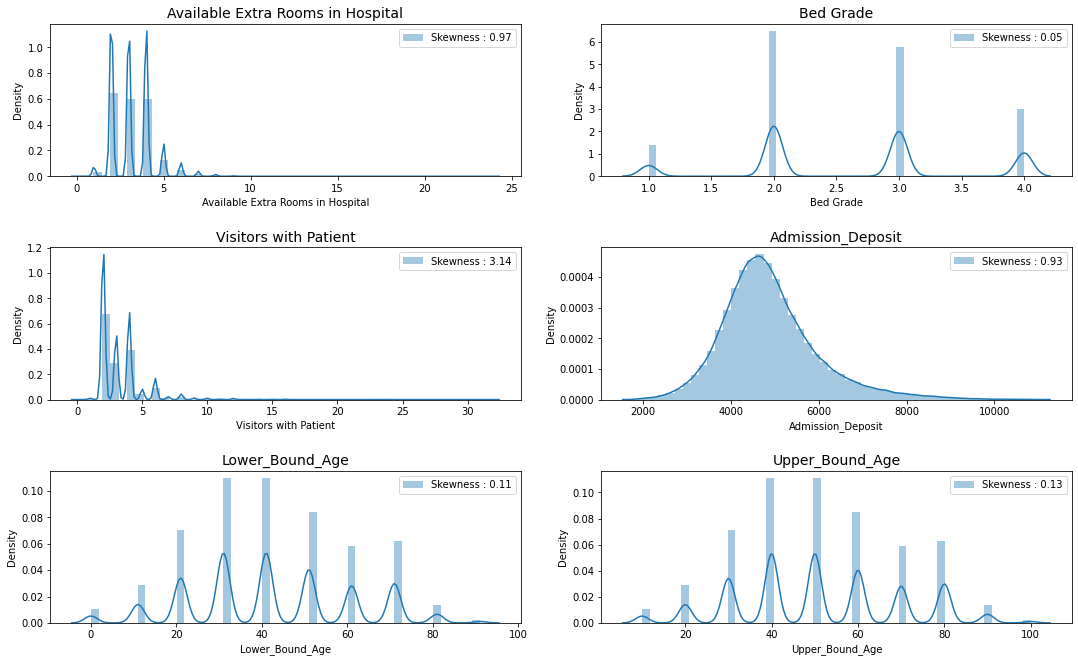

In [40]:
fig, ax =plt.subplots(3,2, figsize=(16,10))
fig.tight_layout(pad=5.0)

for ax, n in zip(ax.flatten(), num_data.columns.tolist()):
    sns.distplot(ax=ax, a=num_data[n].dropna(), label="Skewness : %.2f"%(num_data[n].skew()))
    ax.set_title(n, fontsize = 14)
    ax.legend(loc = 'best')

In [41]:
for n in cols_str[:len(cols_str)]:
    train.groupBy(n).count().sort('count', ascending=False).show()

+------------------+------+
|Hospital_type_code| count|
+------------------+------+
|                 a|143425|
|                 b| 68946|
|                 c| 45928|
|                 e| 24770|
|                 d| 20389|
|                 f| 10703|
|                 g|  4277|
+------------------+------+

+--------------------+------+
|Hospital_region_code| count|
+--------------------+------+
|                   X|133336|
|                   Y|122428|
|                   Z| 62674|
+--------------------+------+

+------------------+------+
|        Department| count|
+------------------+------+
|        gynecology|249486|
|        anesthesia| 29649|
|      radiotherapy| 28516|
|TB & Chest disease|  9586|
|           surgery|  1201|
+------------------+------+

+---------+------+
|Ward_Type| count|
+---------+------+
|        R|127947|
|        Q|106165|
|        S| 77794|
|        P|  5046|
|        T|  1477|
|        U|     9|
+---------+------+

+------------------+------+
|Ward_Fa

In [42]:
train_df.na.drop()
test_df.na.drop()
print('train set after nadrop \n')
train_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train_df.columns[:6])).show()
train_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train_df.columns[6:12])).show()
train_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train_df.columns[12:18])).show()
train_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in train_df.columns[18:20])).show()
print('test set after nadrop  \n')
test_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in test_df.columns[:6])).show()
test_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in test_df.columns[6:12])).show()
test_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in test_df.columns[12:19])).show()

train set after nadrop 

+-------+-------------+------------------+------------------+--------------------+---------------------------------+
|case_id|Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|Available Extra Rooms in Hospital|
+-------+-------------+------------------+------------------+--------------------+---------------------------------+
|      0|            0|                 0|                 0|                   0|                                0|
+-------+-------------+------------------+------------------+--------------------+---------------------------------+

+----------+---------+------------------+---------+---------+-----------------+
|Department|Ward_Type|Ward_Facility_Code|Bed Grade|patientid|City_Code_Patient|
+----------+---------+------------------+---------+---------+-----------------+
|         0|        0|                 0|        0|        0|                0|
+----------+---------+------------------+---------+---------+--------

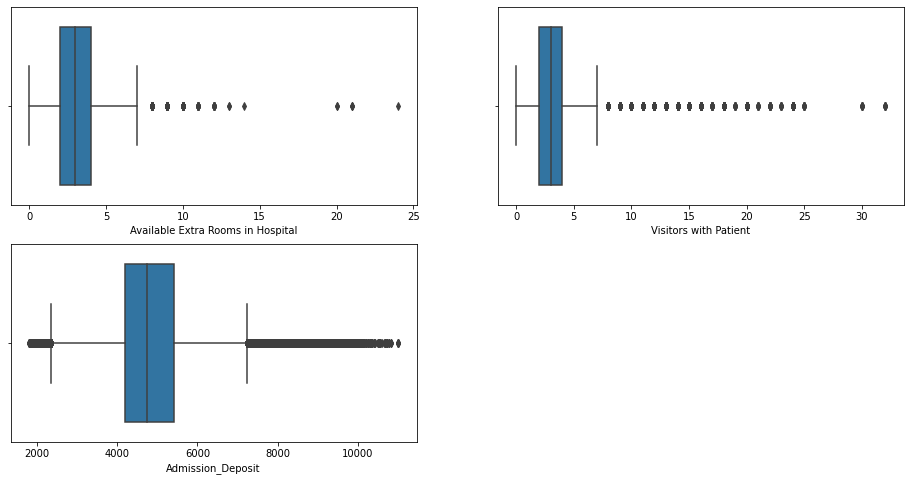

In [43]:
train_pd = train_df.toPandas()
test_pd = test_df.toPandas()
fig, ax = plt.subplots(2,2, figsize = (16,8))
sns.boxplot(ax = ax[0, 0], x = train_pd['Available Extra Rooms in Hospital'])
sns.boxplot(ax = ax[0, 1], x = train_pd['Visitors with Patient'])
sns.boxplot(ax = ax[1, 0], x = train_pd['Admission_Deposit'])
fig.delaxes(ax[1,1])

plt.show()

Show new boxplots after cleaning. 



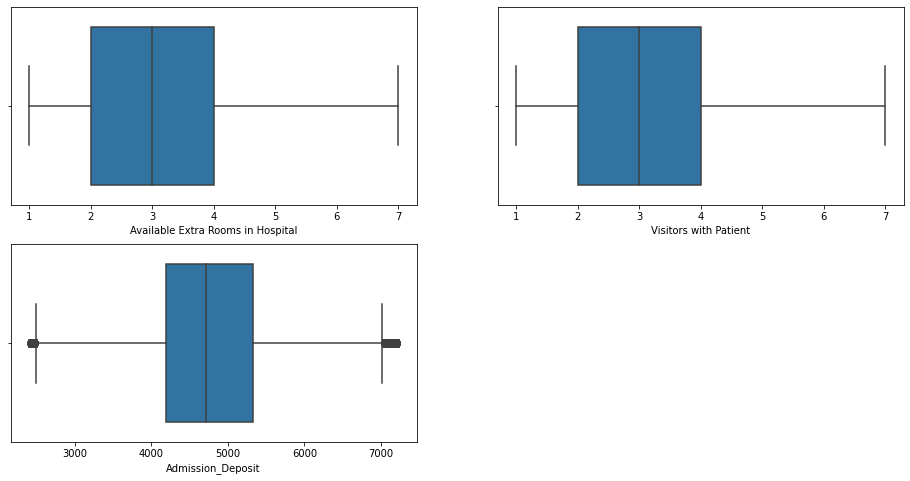

In [44]:
# Remove outliers in the training data
q1 = train_pd['Available Extra Rooms in Hospital'].quantile(0.25)
q3 = train_pd['Available Extra Rooms in Hospital'].quantile(0.75)
iqr = q3-q1
train_pd = train_pd[~((train_pd['Available Extra Rooms in Hospital'] < (q1 - 1.5 * iqr)) | \
                      (train_pd['Available Extra Rooms in Hospital'] > (q3+1.5*iqr)))]

q1 = train_pd['Visitors with Patient'].quantile(0.25)
q3 = train_pd['Visitors with Patient'].quantile(0.75)
iqr = q3-q1
train_pd = train_pd[~ ((train_pd['Visitors with Patient'] < q1 - 1.5 * iqr) | \
                       (train_pd['Visitors with Patient'] > (q3 + 1.5 * iqr)))]

q1 = train_pd['Admission_Deposit'].quantile(0.25)
q3 = train_pd['Admission_Deposit'].quantile(0.75)
iqr = q3-q1
train_pd = train_pd[~ ((train_pd['Admission_Deposit'] < q1 - 1.5 * iqr) | \
                       (train_pd['Admission_Deposit'] > (q3 + 1.5 * iqr)))]

# Remove outliers
train_pd  = train_pd [train_pd ['Available Extra Rooms in Hospital'] > 0]
train_pd  = train_pd [train_pd ['Visitors with Patient'] > 0]

# Print new boxplots after cleaning
print('Show new boxplots after cleaning. \n')
fig, ax = plt.subplots(2,2, figsize = (16,8))
sns.boxplot(ax = ax[0, 0], x = train_pd ['Available Extra Rooms in Hospital'])
sns.boxplot(ax = ax[0, 1], x = train_pd ['Visitors with Patient'])
sns.boxplot(ax = ax[1, 0], x = train_pd ['Admission_Deposit'])
fig.delaxes(ax[1,1])
plt.show()

In [45]:
# Do log transform on data train
train_pd['Available Extra Rooms in Hospital'] = np.log(train_pd['Available Extra Rooms in Hospital'] + 1)
train_pd['Visitors with Patient'] = np.log(train_pd['Visitors with Patient'] + 1)

# Do the same log transform on data test ( for make the same scale value with data train)
test_pd['Available Extra Rooms in Hospital'] = np.log(test_pd['Available Extra Rooms in Hospital'] + 1)
test_pd['Visitors with Patient'] = np.log(test_pd['Visitors with Patient'] + 1)

In [46]:
values1 = train_pd.values.tolist()
columns1 = train_pd.columns.tolist()
train_df = spark.createDataFrame(values1, columns1)

values2 = test_pd.values.tolist()
columns2 = test_pd.columns.tolist()
test_df = spark.createDataFrame(values2, columns2)

In [47]:
print('train set description: \n')
train_df.select(train_df.columns[:5]).describe().show()
train_df.select(train_df.columns[5:10]).describe().show()
train_df.select(train_df.columns[10:15]).describe().show()
train_df.select(train_df.columns[15:len(train_df.columns)]).describe().show()
print('test set description: \n')
test_df.select(test_df.columns[:5]).describe().show()
test_df.select(test_df.columns[5:10]).describe().show()
test_df.select(test_df.columns[10:15]).describe().show()
test_df.select(test_df.columns[15:len(test_df.columns)]).describe().show()

train set description: 

+-------+------------------+------------------+------------------+------------------+--------------------+
|summary|           case_id|     Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|
+-------+------------------+------------------+------------------+------------------+--------------------+
|  count|            295514|            295514|            295514|            295514|              295514|
|   mean|158964.70495137287|18.319582151776228|              null| 4.775262762508714|                null|
| stddev| 91941.44131889935| 8.633959679170841|              null| 3.105637110950756|                null|
|    min|                 1|                 1|                 a|                 1|                   X|
|    max|            318438|                32|                 g|                13|                   Z|
+-------+------------------+------------------+------------------+------------------+--------------------+

+-------+--

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

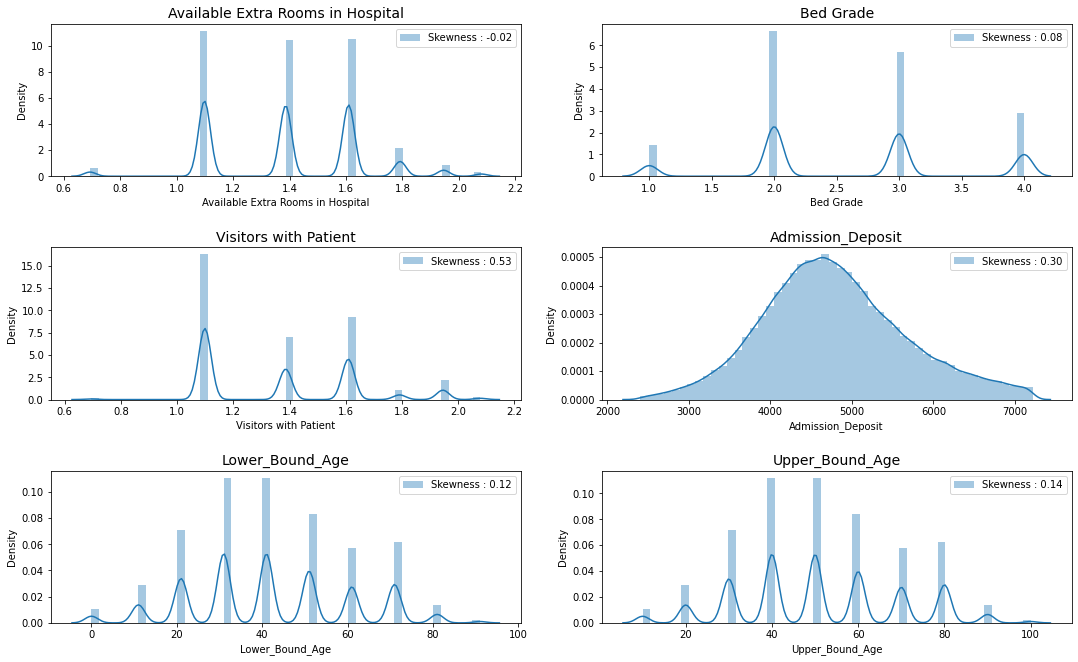

In [48]:
num_data = train_pd[['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit',
                  'Lower_Bound_Age', 'Upper_Bound_Age']]

cat_data = train_pd[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department',
                  'Ward_Type', 'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
                  'Stay']]

fig, ax =plt.subplots(3,2, figsize=(16,10))
fig.tight_layout(pad=5.0)

for ax, n in zip(ax.flatten(), num_data.columns.tolist()):
    sns.distplot(ax=ax, a=num_data[n].dropna(), label="Skewness : %.2f"%(num_data[n].skew()))
    ax.set_title(n, fontsize = 14)
    ax.legend(loc = 'best')

In [49]:
from itertools import chain
from pyspark.sql.functions import create_map, lit
admission_encode = {'Trauma' : 1, 'Urgent' : 2, 'Emergency' : 3}

severity_encode = {'Minor' : 1, 'Moderate' : 2, 'Extreme' : 3}

stay_encode = {'0-10' : 1, '11-20' : 2, '21-30' : 3, '31-40' : 4, '41-50' : 5, '51-60' : 6, '61-70' : 7
            ,'71-80' : 8, '81-90' : 9, '91-100' : 10, 'More than 100 Days' : 11}

mapping_expr1 = create_map([lit(x) for x in chain(*admission_encode.items())])
mapping_expr2 = create_map([lit(x) for x in chain(*severity_encode.items())])
mapping_expr3 = create_map([lit(x) for x in chain(*stay_encode.items())])

train_df = train_df.withColumn('Type of Admission', mapping_expr1[train_df['Type of Admission']])
train_df = train_df.withColumn('Severity of Illness', mapping_expr2[train_df['Severity of Illness']])
train_df = train_df.withColumn('Stay', mapping_expr3[train_df['Stay']])
test_df = test_df.withColumn('Type of Admission', mapping_expr1[test_df['Type of Admission']])
test_df = test_df.withColumn('Severity of Illness', mapping_expr2[test_df['Severity of Illness']])


In [50]:
train_df.select('Type of Admission','Severity of Illness','Stay').show()

+-----------------+-------------------+----+
|Type of Admission|Severity of Illness|Stay|
+-----------------+-------------------+----+
|                3|                  3|   1|
|                1|                  3|   5|
|                1|                  3|   4|
|                1|                  3|   5|
|                1|                  3|   2|
|                3|                  3|   1|
|                1|                  3|   5|
|                1|                  3|   6|
|                1|                  3|   4|
|                2|                  3|   3|
|                2|                  3|   2|
|                3|                  3|   1|
|                3|                  3|   1|
|                2|                  3|   1|
|                3|                  3|   2|
|                1|                  3|   4|
|                1|                  3|   3|
|                1|                  3|   2|
|                2|                  3|   3|
|         

In [51]:
train_df.printSchema()

root
 |-- case_id: long (nullable = true)
 |-- Hospital_code: long (nullable = true)
 |-- Hospital_type_code: string (nullable = true)
 |-- City_Code_Hospital: long (nullable = true)
 |-- Hospital_region_code: string (nullable = true)
 |-- Available Extra Rooms in Hospital: double (nullable = true)
 |-- Department: string (nullable = true)
 |-- Ward_Type: string (nullable = true)
 |-- Ward_Facility_Code: string (nullable = true)
 |-- Bed Grade: double (nullable = true)
 |-- patientid: long (nullable = true)
 |-- City_Code_Patient: double (nullable = true)
 |-- Type of Admission: integer (nullable = true)
 |-- Severity of Illness: integer (nullable = true)
 |-- Visitors with Patient: double (nullable = true)
 |-- Age: string (nullable = true)
 |-- Admission_Deposit: double (nullable = true)
 |-- Stay: integer (nullable = true)
 |-- Lower_Bound_Age: long (nullable = true)
 |-- Upper_Bound_Age: long (nullable = true)



In [53]:
from pyspark.sql.types import *
test_df = test_df.withColumn('Stay', lit(None).cast(IntegerType()))
test_df.select('Type of Admission','Severity of Illness','Stay').show()

+-----------------+-------------------+----+
|Type of Admission|Severity of Illness|Stay|
+-----------------+-------------------+----+
|                3|                  2|null|
|                1|                  2|null|
|                3|                  2|null|
|                1|                  2|null|
|                1|                  2|null|
|                1|                  2|null|
|                1|                  2|null|
|                3|                  2|null|
|                1|                  2|null|
|                2|                  2|null|
|                1|                  2|null|
|                3|                  2|null|
|                1|                  2|null|
|                2|                  2|null|
|                3|                  2|null|
|                3|                  2|null|
|                3|                  2|null|
|                1|                  2|null|
|                3|                  2|null|
|         

In [55]:
print(train_df.columns)
print(test_df.columns)

['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay', 'Lower_Bound_Age', 'Upper_Bound_Age']
['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', 'Admission_Deposit', 'Lower_Bound_Age', 'Upper_Bound_Age', 'Stay']


In [57]:
train_df = train_df.select('Stay','case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', \
                           'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', \
                           'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient', \
                           'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', \
                           'Admission_Deposit', 'Lower_Bound_Age', 'Upper_Bound_Age')
test_df = test_df.select('Stay','case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', \
                           'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', \
                           'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient', \
                           'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', \
                           'Admission_Deposit', 'Lower_Bound_Age', 'Upper_Bound_Age')

In [58]:
train_df.show(2, False)
test_df.show(2, False)

+----+-------+-------------+------------------+------------------+--------------------+---------------------------------+------------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+---------------+---------------+
|Stay|case_id|Hospital_code|Hospital_type_code|City_Code_Hospital|Hospital_region_code|Available Extra Rooms in Hospital|Department  |Ward_Type|Ward_Facility_Code|Bed Grade|patientid|City_Code_Patient|Type of Admission|Severity of Illness|Visitors with Patient|Age  |Admission_Deposit|Lower_Bound_Age|Upper_Bound_Age|
+----+-------+-------------+------------------+------------------+--------------------+---------------------------------+------------+---------+------------------+---------+---------+-----------------+-----------------+-------------------+---------------------+-----+-----------------+---------------+---------------+
|1   |1      |8            |c                 

In [59]:
train_pd = train_df.toPandas()
test_pd = test_df.toPandas()

<AxesSubplot:>

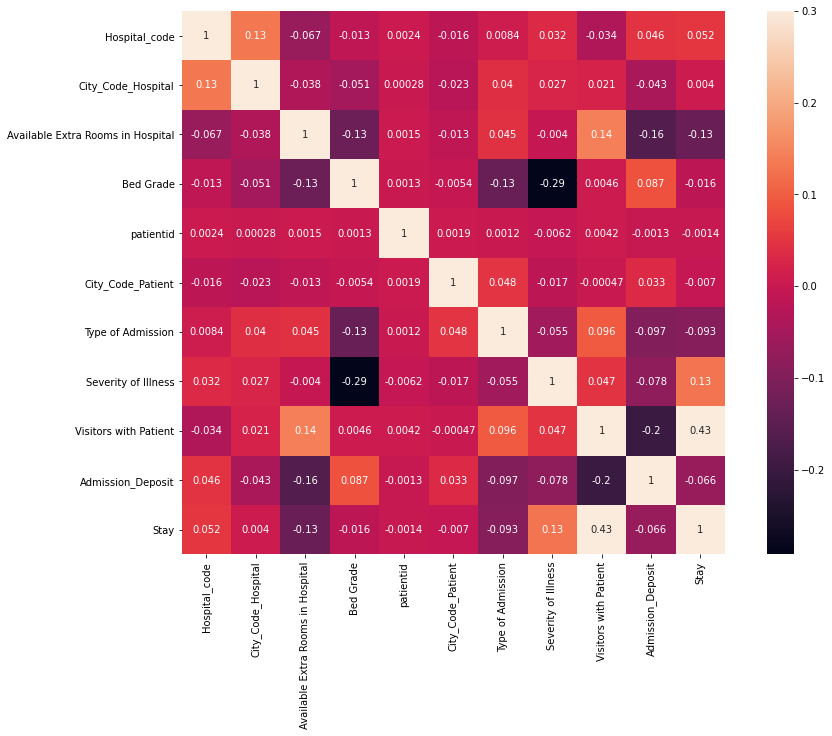

In [60]:
c=train_pd[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(c,vmax=.3, square=True,annot=True)

In [64]:
train_dfd = train_df.drop('case_id','City_Code_Patient','City_Code_Hospital','patientid', \
                          'Hospital_type_code','Hospital_region_code','Department','Ward_Type', \
                          'Ward_Facility_Code','Type of Admission','Severity of Illness','Age')
test_dfd = train_df.drop('case_id','City_Code_Patient','City_Code_Hospital','patientid', \
                          'Hospital_type_code','Hospital_region_code','Department','Ward_Type', \
                          'Ward_Facility_Code','Type of Admission','Severity of Illness','Age')

In [62]:
train_dfd.show()

+----+-------------+---------------------------------+---------+---------------------+-----------------+---------------+---------------+
|Stay|Hospital_code|Available Extra Rooms in Hospital|Bed Grade|Visitors with Patient|Admission_Deposit|Lower_Bound_Age|Upper_Bound_Age|
+----+-------------+---------------------------------+---------+---------------------+-----------------+---------------+---------------+
|   1|            8|               1.3862943611198906|      2.0|   1.0986122886681098|           4911.0|             51|             60|
|   5|            2|               1.0986122886681098|      2.0|   1.0986122886681098|           5954.0|             51|             60|
|   4|           10|               1.0986122886681098|      2.0|   1.0986122886681098|           4745.0|             51|             60|
|   5|           26|               1.0986122886681098|      2.0|   1.0986122886681098|           5558.0|             51|             60|
|   2|           23|               1.0986

In [74]:
train_df0 = train_df
from pyspark.ml.feature import StringIndexer, VectorAssembler

old_columns_names = train_df0.columns
new_columns_names = [name+'_new' for name in old_columns_names]

for i in range(len(old_columns_names)):
    indexer = StringIndexer(inputCol=old_columns_names[i], outputCol=new_columns_names[i])
    train_df0 = indexer.fit(train_df0).transform(train_df0)
    
vecAss = VectorAssembler(inputCols=new_columns_names[1:], outputCol='features')
train_df0 = vecAss.transform(train_df0)

train_df0 = train_df0.withColumnRenamed(new_columns_names[0], 'label')


train_df1 = train_df0.select(['label', 'features'])


train_df1.show(50, truncate=0)


+-----+--------------------------------------------------------------------------------------------+
|label|features                                                                                    |
+-----+--------------------------------------------------------------------------------------------+
|4.0  |[0.0,26.0,2.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,325.0,3.0,1.0,2.0,0.0,2.0,24.0,2.0,2.0]           |
|5.0  |[103102.0,22.0,2.0,5.0,2.0,0.0,2.0,2.0,0.0,0.0,325.0,3.0,0.0,2.0,0.0,2.0,2614.0,2.0,2.0]    |
|2.0  |[205826.0,13.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,325.0,3.0,0.0,2.0,0.0,2.0,321.0,2.0,2.0]     |
|5.0  |[243696.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,325.0,3.0,0.0,2.0,0.0,2.0,1564.0,2.0,2.0]     |
|1.0  |[254068.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,325.0,3.0,0.0,2.0,0.0,2.0,118.0,2.0,2.0]      |
|4.0  |[264416.0,11.0,5.0,6.0,1.0,5.0,2.0,2.0,4.0,1.0,325.0,3.0,1.0,2.0,0.0,2.0,2873.0,2.0,2.0]    |
|5.0  |[274831.0,1.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,325.0,3.0,0.0,2.0,0.0,2.0,2323.0,2.0,2

In [77]:
train_df1.select('label').distinct().show()

+-----+
|label|
+-----+
|  8.0|
|  0.0|
|  7.0|
|  1.0|
|  4.0|
|  3.0|
|  2.0|
| 10.0|
|  6.0|
|  5.0|
|  9.0|
+-----+



In [105]:
train_df00 = train_dfd
from pyspark.ml.feature import StringIndexer, VectorAssembler

old_columns_names0 = train_df00.columns
new_columns_names0 = [name+'_new' for name in old_columns_names0]

for i in range(len(old_columns_names0)):
    indexer = StringIndexer(inputCol=old_columns_names0[i], outputCol=new_columns_names0[i]).setHandleInvalid("keep")
    train_df00 = indexer.fit(train_df00).transform(train_df00)
    
vecAss = VectorAssembler(inputCols=new_columns_names0[1:], outputCol='features')
train_df00 = vecAss.transform(train_df00)

train_df00 = train_df00.withColumnRenamed(new_columns_names0[0], 'label')


train_df10 = train_df00.select(['label', 'features'])


train_df10.show(50, truncate=0)

+-----+---------------------------------+
|label|features                         |
+-----+---------------------------------+
|4.0  |[26.0,2.0,0.0,0.0,24.0,2.0,2.0]  |
|5.0  |[22.0,0.0,0.0,0.0,2614.0,2.0,2.0]|
|2.0  |[13.0,0.0,0.0,0.0,321.0,2.0,2.0] |
|5.0  |(7,[4,5,6],[1564.0,2.0,2.0])     |
|1.0  |[1.0,0.0,0.0,0.0,118.0,2.0,2.0]  |
|4.0  |[11.0,5.0,1.0,0.0,2873.0,2.0,2.0]|
|5.0  |[1.0,1.0,1.0,0.0,2323.0,2.0,2.0] |
|3.0  |[21.0,0.0,2.0,0.0,4495.0,2.0,2.0]|
|2.0  |[13.0,0.0,1.0,0.0,2464.0,2.0,2.0]|
|0.0  |[24.0,0.0,0.0,0.0,2070.0,2.0,2.0]|
|1.0  |[0.0,1.0,3.0,0.0,2208.0,2.0,2.0] |
|4.0  |[28.0,0.0,1.0,0.0,600.0,2.0,2.0] |
|4.0  |[3.0,1.0,1.0,0.0,4526.0,4.0,4.0] |
|4.0  |[1.0,1.0,1.0,1.0,4228.0,4.0,4.0] |
|1.0  |[10.0,1.0,1.0,0.0,952.0,4.0,4.0] |
|2.0  |[9.0,1.0,0.0,0.0,691.0,4.0,4.0]  |
|0.0  |[17.0,0.0,1.0,0.0,3861.0,4.0,4.0]|
|1.0  |[15.0,0.0,1.0,0.0,2910.0,4.0,4.0]|
|0.0  |[3.0,2.0,1.0,0.0,393.0,4.0,4.0]  |
|2.0  |[0.0,1.0,3.0,1.0,1185.0,4.0,4.0] |
|1.0  |(7,[0,1,4],[5.0,1.0,4568.0]

In [110]:
test_df00 = test_dfd
from pyspark.ml.feature import StringIndexer, VectorAssembler

old_columns_names0 = test_df00.columns
new_columns_names0 = [name+'_new' for name in old_columns_names0]

for i in range(len(old_columns_names0)):
    indexer = StringIndexer(inputCol=old_columns_names0[i], outputCol=new_columns_names0[i])
    test_df00 = indexer.fit(test_df00).transform(test_df00)
    
vecAss = VectorAssembler(inputCols=new_columns_names0[1:], outputCol='features').setHandleInvalid("keep")
test_df00 = vecAss.transform(test_df00)

test_df00 = test_df00.withColumnRenamed(new_columns_names0[0], 'label')


test_df10 = test_df00.select(['label', 'features'])


test_df10.show(5, truncate=0)

+-----+---------------------------------+
|label|features                         |
+-----+---------------------------------+
|4.0  |[26.0,2.0,0.0,0.0,24.0,2.0,2.0]  |
|5.0  |[22.0,0.0,0.0,0.0,2614.0,2.0,2.0]|
|2.0  |[13.0,0.0,0.0,0.0,321.0,2.0,2.0] |
|5.0  |(7,[4,5,6],[1564.0,2.0,2.0])     |
|1.0  |[1.0,0.0,0.0,0.0,118.0,2.0,2.0]  |
+-----+---------------------------------+
only showing top 5 rows



In [95]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [115]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(train_df10)
scaledData = scalerModel.transform(train_df10)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
train_df20 = scaledData.select("label", "scaledFeatures")
train_df20 = train_df20.withColumnRenamed('scaledFeatures', 'features')
train_df20.show()


Features scaled to range: [0.000000, 1.000000]
+-----+--------------------+
|label|            features|
+-----+--------------------+
|  4.0|[0.83870967741935...|
|  5.0|[0.70967741935483...|
|  2.0|[0.41935483870967...|
|  5.0|(7,[4,5,6],[0.325...|
|  1.0|[0.03225806451612...|
|  4.0|[0.35483870967741...|
|  5.0|[0.03225806451612...|
|  3.0|[0.67741935483870...|
|  2.0|[0.41935483870967...|
|  0.0|[0.77419354838709...|
|  1.0|[0.0,0.1666666666...|
|  4.0|[0.90322580645161...|
|  4.0|[0.09677419354838...|
|  4.0|[0.03225806451612...|
|  1.0|[0.32258064516129...|
|  2.0|[0.29032258064516...|
|  0.0|[0.54838709677419...|
|  1.0|[0.48387096774193...|
|  0.0|[0.09677419354838...|
|  2.0|[0.0,0.1666666666...|
+-----+--------------------+
only showing top 20 rows



In [116]:
# Split the training and testing set.
train_data,test_data = train_df20.randomSplit([0.7,0.3])

In [120]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(maxDepth=5)
dtModel = dt.fit(train_data)

In [121]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(numTrees=10, maxDepth=5)
rfModel = rf.fit(train_data)

In [134]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes()
nbModel = nb.fit(train_data)

In [124]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(maxDepth=5)
dtModel = dt.fit(train_data)
dtc_predictions = dtModel.transform(test_data)

# accuracy
dtc_predictions.filter(dtc_predictions.label == dtc_predictions.prediction).count()/dtc_predictions.count()

0.34912308350406374

In [125]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(numTrees=10, maxDepth=5)
rfModel = rf.fit(train_data)
rfc_predictions = rfModel.transform(test_data)

# accuracy
rfc_predictions.filter(rfc_predictions.label == rfc_predictions.prediction).count()/rfc_predictions.count()

0.35933313821284646

In [135]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes()
nbModel = nb.fit(train_data)
nb_predictions = nbModel.transform(test_data)

#accuracy
nb_predictions.filter(nb_predictions.label == nb_predictions.prediction).count()/nb_predictions.count()


0.2800504311412297

In [137]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [138]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [139]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
nb_acc = acc_evaluator.evaluate(nb_predictions)

In [141]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using Naive Bayes has an accuracy of: {0:2.2f}%'.format(nb_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 34.91%
----------------------------------------
A random forest ensemble has an accuracy of: 35.93%
----------------------------------------
An ensemble using Naive Bayes has an accuracy of: 28.01%


In [142]:
train_pd20 = train_df20.toPandas()

In [143]:
x_train = train_pd20.iloc[:, 1:].values
y_train = train_pd20.iloc[:, 0].values
